In [ ]:
# LangChain 1.0: Updated imports
# Note: create_react_agent from langgraph.prebuilt is deprecated
# Use create_agent from langchain.agents instead

from langchain.chat_models import init_chat_model
from langchain.agents import create_agent  # NEW: replaces langgraph.prebuilt.create_react_agent
from langchain_core.messages import HumanMessage
from langgraph.checkpoint.memory import MemorySaver

# OLD (deprecated):
# from langgraph.prebuilt import create_react_agent

# For Tavily search, use the new langchain-tavily package
from langchain_tavily import TavilySearch

In [4]:
# Create the agent
memory = MemorySaver()

In [6]:
llm = init_chat_model(model="gpt-4o-mini")


llm.invoke("What is an agent based on large language models?")

AIMessage(content='An agent based on large language models (LLMs) refers to a software entity that utilizes the capabilities of an LLM to perform specific tasks, interact with users, or make decisions. These agents leverage the natural language processing and understanding abilities of LLMs to interpret and generate human-like text, enabling them to engage in conversations, answer questions, provide recommendations, and perform various functions based on textual input.\n\nKey characteristics of agents based on LLMs include:\n\n1. **Natural Language Understanding**: They can comprehend and process natural language, allowing for smooth interactions with users.\n\n2. **Conversational Abilities**: They can engage in dialogue, maintaining context and coherence over multiple exchanges, which enables them to simulate more human-like conversations.\n\n3. **Task Performance**: Depending on their design, these agents can perform a range of tasks, such as answering queries, providing summaries, g

In [ ]:
# LangChain 1.0: Use TavilySearch from langchain-tavily
# The old TavilySearchResults from langchain-community is deprecated
search = TavilySearch(max_results=3)

In [10]:
tools = [search]

In [ ]:
# LangChain 1.0: create_agent with checkpointer for memory
# Note: create_react_agent from langgraph.prebuilt is deprecated

llm = init_chat_model(model="gpt-4o-mini")
tools = [search]

# NEW pattern: use create_agent from langchain.agents
agent_executor = create_agent(
    model=llm,  # Can also use string format: "openai:gpt-4o-mini"
    tools=tools,
    checkpointer=memory,  # Optional: for conversation persistence
)

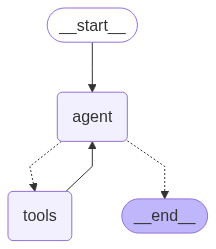

In [12]:
from IPython.display import Image, display

display(Image(agent_executor.get_graph().draw_mermaid_png()))

In [14]:
agent_executor.invoke({"messages": [HumanMessage(content="How did langgraph improved with respect to langchain as an LLM application framework?")]},config = {"configurable": {"thread_id": "abc123"}})

{'messages': [HumanMessage(content='How did langgraph improved with respect to langchain as an LLM application framework?', additional_kwargs={}, response_metadata={}, id='c4d5c7da-fe27-4408-ad6a-f31bd35352ac'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_kK3p6H6zouMcklLTZUCNkKNd', 'function': {'arguments': '{"query":"Langgraph improvements over Langchain LLM application framework"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 27, 'prompt_tokens': 96, 'total_tokens': 123, 'completion_tokens_details': {'audio_tokens': 0, 'reasoning_tokens': 0, 'accepted_prediction_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_8bda4d3a2c', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--b05b728d-b29a-4656-9945-132ef98ee512-0', tool_calls=[{'name'

In [8]:
# Use the agent
config = {"configurable": {"thread_id": "abc123"}}
for chunk in agent_executor.stream(
    {"messages": [HumanMessage(content="hi im bob! and i live in sf")]}, config
):
    print(chunk)
    print("----")

for chunk in agent_executor.stream(
    {"messages": [HumanMessage(content="whats the weather where I live?")]}, config
):
    print(chunk)
    print("----")

{'agent': {'messages': [AIMessage(content="Hi Bob! It's great to meet you. How's life in San Francisco?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 88, 'total_tokens': 105, 'completion_tokens_details': {'audio_tokens': 0, 'reasoning_tokens': 0, 'accepted_prediction_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_bba3c8e70b', 'finish_reason': 'stop', 'logprobs': None}, id='run-af9de20a-f905-4972-bfc5-5ec5b707ff4b-0', usage_metadata={'input_tokens': 88, 'output_tokens': 17, 'total_tokens': 105, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}}
----
{'agent': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_UFdwE6U5TjsJpVKI40kHzmHu', 'function': {'arguments': '{"query":"San Francisco weather"}',